# **Practical No. 12th: K-Means**

>  **Title:** *Write program to irnplernent K-rneans Algorithm*

> **Domain:** Machine Learning
 <br> **Technology:** Python

> **Library**:
* Pandas
* Scikit-Learn

> **Description:** K-means is an unsupervised machine learning algorithm used for clustering data into K distinct groups based on similarity. It works by randomly initializing K centroids, assigning each data point to the nearest centroid to form clusters, and then updating the centroids as the mean of all points in each cluster.

> **Resource:**
  
---
<center> </center>


### Import Library

In [1]:
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Import Dataset

In [3]:
path = kagglehub.dataset_download("ganeshborkar31/car-dekho")

100%|██████████| 55.8k/55.8k [00:00<00:00, 41.3MB/s]

Extracting files...


In [4]:
df = pd.read_csv(f"{path}/cardekho.csv")

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Plot data

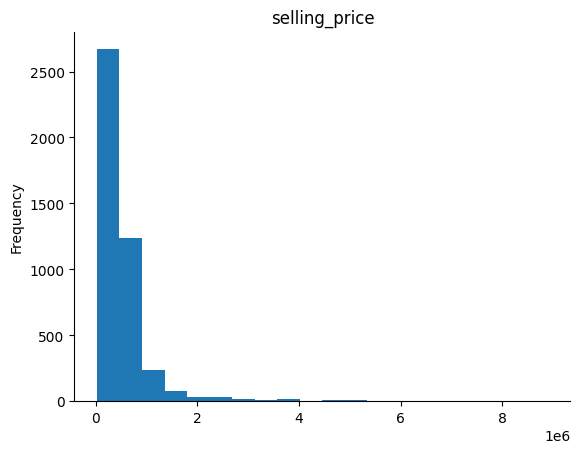

In [ ]:
df['selling_price'].plot(kind='hist', bins=20, title='selling_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Label encoding

In [6]:
label_encoder = LabelEncoder()

In [7]:
df['fuel'] = label_encoder.fit_transform(df['fuel'])
df['seller_type'] = label_encoder.fit_transform(df['seller_type'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['owner'] = label_encoder.fit_transform(df['owner'])

In [8]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


### Define X and Y

In [9]:
features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
target = 'selling_price'

In [10]:
X = df[features]
y = df[target]

> Shape of X and y

In [ ]:
print("Shape of X:", X.shape)
print("Shape of Y:", y.shape)

Shape of X: (4340, 6)
Shape of Y: (4340,)


### Split into train test
> test size 20%

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

> Shape of test train

In [ ]:
print('x_train:', X_train.shape, 'y_train:', y_train.shape)
print('x_test: ', X_test.shape,  'y_test: ', y_test.shape)

x_train: (3472, 6) y_train: (3472,)
x_test:  (868, 6) y_test:  (868,)


### Define Algorithm

> K Means

In [26]:
kmeans_model = KMeans(n_clusters=80, random_state=42)

### Fit algorithm

In [27]:
kmeans_model.fit(X_train)

KMeans(n_clusters=80, random_state=42)

### Predict result

In [28]:
y_pred = kmeans_model.predict(X_test)

### Check score

In [29]:
silhouette_avg = silhouette_score(X_test, y_pred)
print(f"{silhouette_avg}")

0.7631229729277599
